In [1]:
import os
import pathlib
import sys
from dataclasses import asdict

import matplotlib.pyplot as plt
import netket as nk
import pandas as pd
import numpy as np

project_path = pathlib.Path(os.getcwd()).parent
sys.path.append(project_path.as_posix())

from src.app import App
from src.model.struct import ChainConfig
from src.utils import report_name
from src.result.struct import Result

/home/merkul/Project/XYZModelNQS/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/merkul/Project/XYZModelNQS/project/notebooks
JAX devices: [CpuDevice(id=0)]
Default device: <jax._src.config.State object at 0x7f4c6cfcdcb0>


In [11]:
chain_cfg = ChainConfig(
    spin=1 / 2,
    gamma=0,
    lam=1,
    j=1,
    n=8,
    h=0.0,
)

In [3]:
DATA = pathlib.Path("../" + App.path_data)
REPORT_DATA = DATA / report_name(chain_cfg)

In [4]:
data = pd.read_csv(REPORT_DATA)
data.head()

,spin,gamma,lam,j,n,h,estimated_e,estimated_e_var,estimated_1z,estimated_nz,estimated_xx,estimated_yy,estimated_zz,estimated_zz_mid


In [12]:
hilbert = nk.hilbert.Spin(N=chain_cfg.n, s=chain_cfg.spin)

# h = data["h"]
h = np.linspace(0, 1.5, 10)
e = []
for curr_h in h:
    chain_cfg.h = curr_h
    en = Result.analytical_energy(chain_cfg, hilbert, order=0)
    e.append(en)

In [14]:
e

[np.float64(-9.517540966287235),
 np.float64(-9.521135213978692),
 np.float64(-9.532537035214702),
 np.float64(-9.553905984240437),
 np.float64(-9.671446394649491),
 np.float64(-9.970940594363372),
 np.float64(-10.280483148794271),
 np.float64(-10.598263918283862),
 np.float64(-10.92407200599258),
 np.float64(-11.259475073902674)]

ValueError: x and y must be the same size

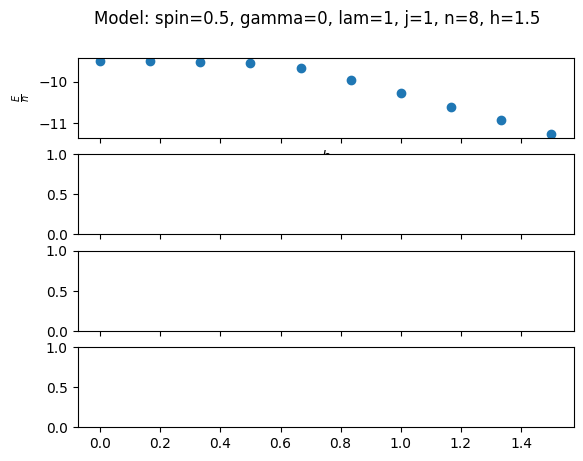

In [13]:
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, sharey=False)
suptitle = "Model: "
suptitle += ", ".join(map(lambda kv: f"{kv[0]}={kv[1]}", asdict(chain_cfg).items()))
fig.suptitle(suptitle)

ax[0].set(xlabel=r"$h$", ylabel=r"$\frac{E}{n}$")
ax[0].scatter(h, e)
ax[0].scatter(h, data["estimated_e"])

ax[1].set(xlabel=r"$h$", ylabel=r"$\langle \hat{S}_i^x \hat{S}_{i+1}^x \rangle$")
ax[1].scatter(h, data["estimated_xx"])

ax[2].set(xlabel=r"$h$", ylabel=r"$\langle \hat{S}_i^y \hat{S}_{i+1}^y \rangle$")
ax[2].scatter(h, data["estimated_yy"])

ax[3].set(xlabel=r"$h$", ylabel=r"$\langle \hat{S}_i^z \hat{S}_{i+1}^z \rangle$")
ax[3].scatter(h, data["estimated_zz"])

plt.show()

In [5]:
h = np.linspace(0, 1.5, 100)
xy_dict = dict()
for curr_h in h:
    chain_cfg.h = curr_h
    xy_res = Result.analytical_xy(chain_cfg)
    for xy_k, xy_v in xy_res.items():
        if xy_k not in xy_dict:
            xy_dict[xy_k] = []
        xy_dict[xy_k].append(xy_v)

fig, ax = plt.subplots(nrows=len(xy_dict), ncols=1, sharex=True, sharey=False)
suptitle = "Model: "
suptitle += ", ".join(map(lambda kv: f"{kv[0]}={kv[1]}", asdict(chain_cfg).items()))
fig.suptitle(suptitle)

for i, (xy_k, xy_v) in enumerate(xy_dict.items()):
    ax[i].set(xlabel=r"$h$", ylabel=xy_k)
    ax[i].scatter(h, xy_v)

plt.show()

ValueError: type is not xy